# 1. Получаем все данные из таблицы

✍ Как вы помните, данные в БД хранятся в таблицах. В этом модуле мы будем работать с таблицей kinopoisk: она содержит данные о 250 лучших фильмах по версии сервиса «Кинопоиск» (рейтинг собран в мае 2020 года).

Давайте посмотрим на таблицу kinopoisk и изучим, какие данные в ней хранятся:

|Название поля|Содержимое|
|-------------|----------|
|position|номер в базе данных|
|movie_title|название фильма|
|year|год выпуска|
|country|страна выпуска|
|rating|рейтинг фильма в базе|
|overview|описание фильма|

<code>

SELECT *

FROM sql.kinopoisk
</code>

В результате вы увидите всё содержимое таблицы.

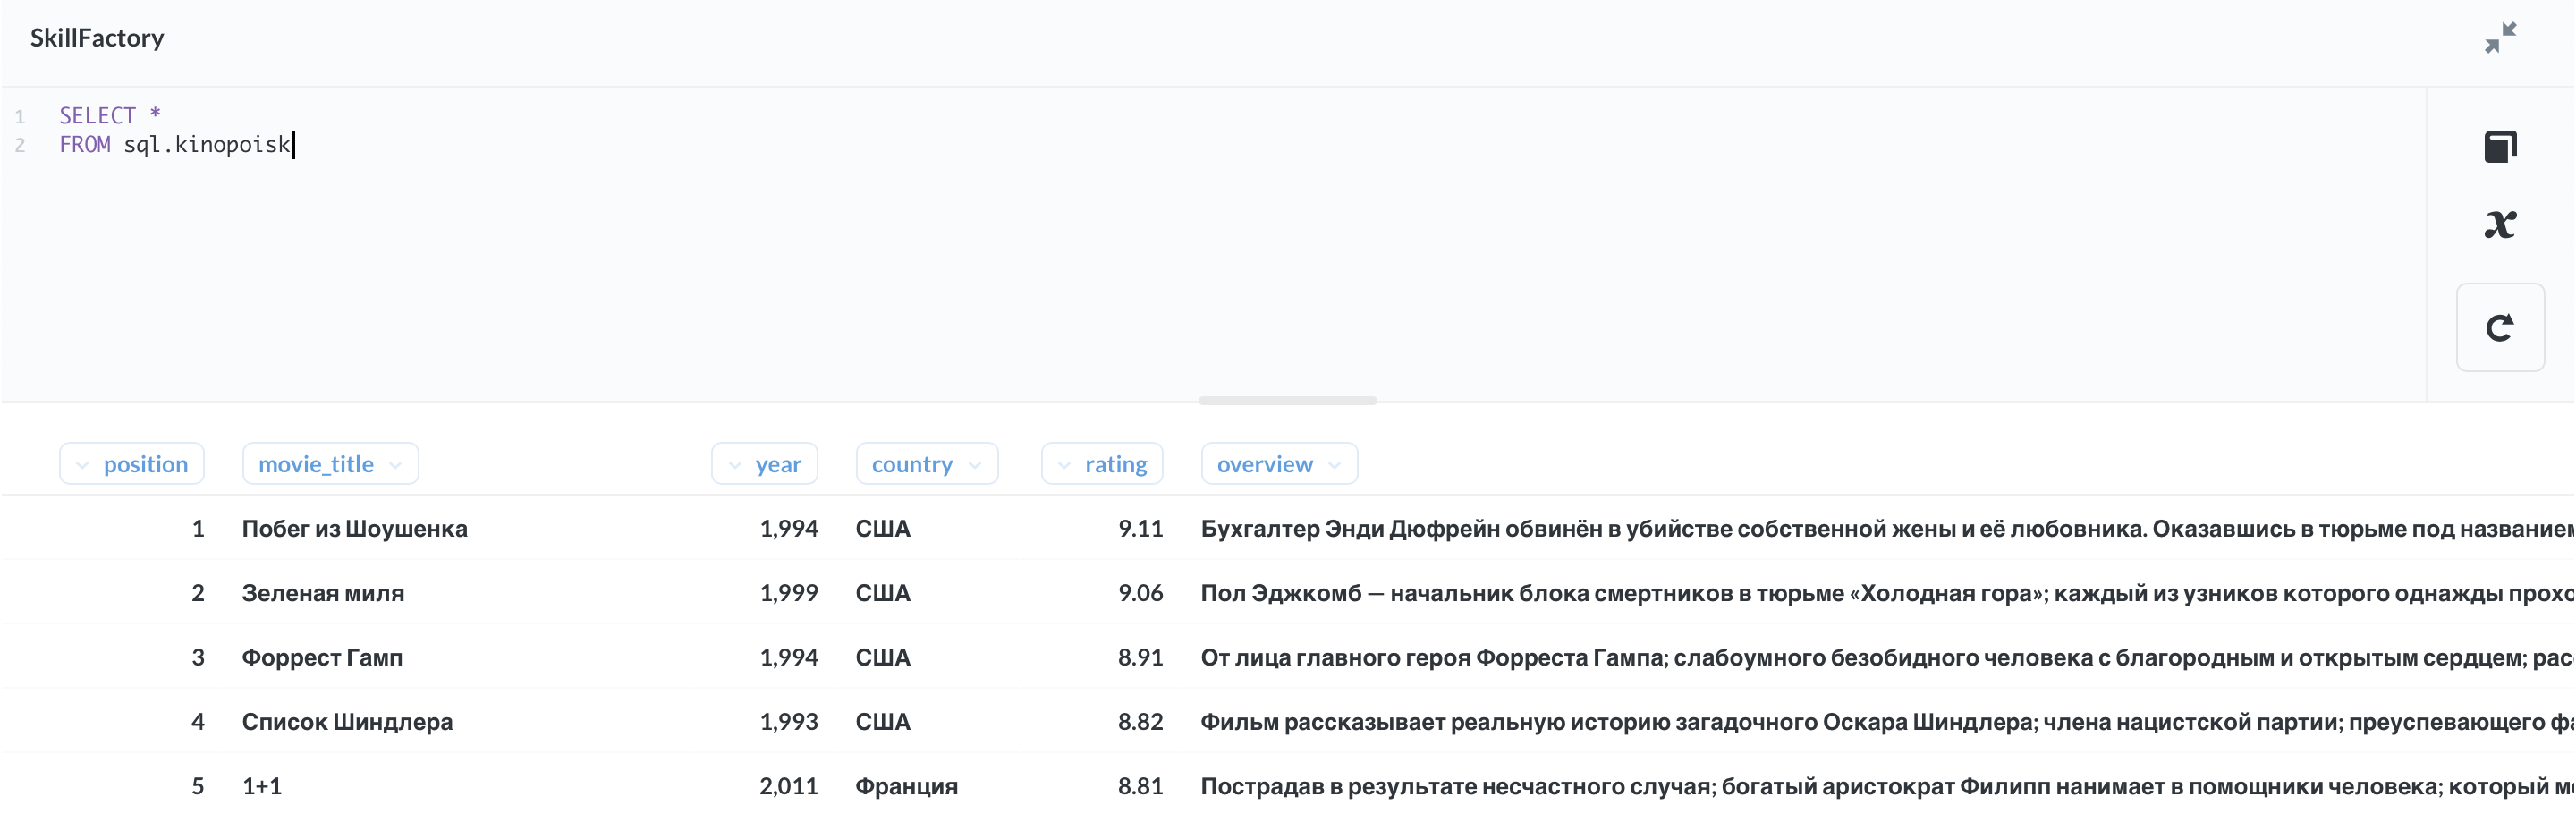

**Обратите внимание!** Metabase выводит только первые 2 000 строк: в нашем случае таблица полностью уместилась в выводе.

При этом отображена только часть вывода, поскольку не все строки и столбцы влезли на экран. Вы можете увидеть всё содержимое таблицы, прокрутив страницу по вертикали и горизонтали.

Что ещё мы видим? Числа отображаются в американском формате (с десятичным разделителем — точкой и разделителем разрядов — запятой).

Теперь давайте разберём запрос, благодаря которому мы получили такой результат.

!
### РАЗБИРАЕМ ЗАПРОС

* → Оператор SELECT сообщает СУБД, что вы хотите извлечь из неё данные. SELECT лежит в основе любого SQL-запроса к БД.
* → FROM sql.kinopoisk сообщает, из какой таблицы извлекаются данные. Сначала указывается название схемы, в которой содержится таблица (в нашем случае — это sql), а после точки — название самой таблицы (kinopoisk).
* → Звёздочка * указывает, что вы хотите видеть все столбцы этой таблицы.

Если же вам нужны не все столбцы, а только некоторые, вместо звёздочки перечислите названия всех интересующих вас столбцов **через запятую**.

**Важно!** SQL нечувствителен к регистру, поэтому ключевые слова можно писать хоть строчными, хоть прописными буквами: SELECT, select или SeLeCt.

Независимо от того, в каком порядке представлены столбцы в таблице, в запросе вы можете указывать их в любой очерёдности.

Порядок столбцов в выводе будет совпадать с их расположением после оператора SELECT.

Проведём несколько математических операций с нашим выводом.

Допустим, вы хотите написать запрос, аналогичный запросу из задания, только вместо года выхода фильма, вам нужен его «возраст» на 2020 год.

В таком случае наш запрос будет выглядеть так:
<code>

SELECT
    movie_title,

    2020 - year,

    rating

FROM sql.kinopoisk
</code>

То есть мы отняли от 2020 года год выхода фильма и получили его возраст! Элементарно!

### ЧТО МЫ ВИДИМ?

Столбец с вычислениями в выводе называется ?column?, потому что Metabase не смог подобрать для него название.

Давайте наведём порядок и переименуем столбец!

Для этого используем ключевое слово AS и поставим после него новое имя difference. Можем повторить этот процесс для каждого столбца.

<code>

SELECT

    director,

    movie_title,

    10 - rating AS difference

FROM sql.kinopoisk
</code>

Новое имя является просто псевдонимом, или **алиасом**, — оно временное и не меняет реального имени столбца в базе данных. Алиас влияет только на то, как столбец отображается в выводе конкретного запроса.

**Алиас** — имя, назначенное источнику данных в запросе при использовании выражения в качестве источника данных или для упрощения ввода и прочтения инструкции SQL.
Алиасом может быть как одно слово, так и несколько, а его написание — как латиницей, так и кириллицей.

**Обратите внимание!** Если в алиасе используются пробелы, необходимо заключать весь псевдоним в двойные кавычки, например, movie_title AS "Movie Title".

⚡ **Будьте внимательны!** При выполнении заданий в рамках курса используйте алиасы аккуратно. Если в задаче не указано, какое имя нужно присвоить столбцу, значит, его нужно выводить под тем же названием, что дано ему в таблице.

## ПРОСТЫЕ ОПЕРАЦИИ С ДАННЫМИ

Со столбцами, которые содержат числовые данные, можно проводить арифметические операции:

* сложение с помощью + ;
* вычитание с помощью - (этот тип операции вы уже проводили, когда определяли «возраст» фильма);
* умножение с помощью * ;
* деление с помощью / ;

**Важно!** Если и числитель, и знаменатель — целые числа, результат деления также будет целочисленным, то есть этот оператор произведёт деление нацело.
* получение остатка от деления с помощью % .

**ДОПОЛНИТЕЛЬНО**

С полным перечнем доступных арифметических операций вы можете ознакомиться в [официальной документации](https://postgrespro.ru/docs/postgresql/11/functions-math).

Также мы можем проводить арифметические операции с несколькими столбцами.


Давайте выведем для каждого фильма результат деления года его выпуска на рейтинг (что бы это ни значило :)).

<code>

SELECT

    movie_title,

    year / rating
    
FROM sql.kinopoisk
</code>


# 2. Фильтруем строки

## WHERE

Мы уже знаем, что делать, если нам нужны лишь несколько столбцов из таблицы.

?
Но как быть, если мы хотим видеть не все строки, а только некоторые из них?

В таком случае нам пригодится ключевое слово WHERE.

Получим для примера всю информации о фильме, занимающем первую позицию.

<code>

SELECT *

FROM sql.kinopoisk

WHERE position = 1

</code>

В запросах выше мы использовали знак равно (=), но никто не запретит нам использовать и условные операторы.

Вы можете применять знаки < (меньше), <= (меньше или равно), > (больше), >= (больше или равно).

Посмотрим на фильмы, которые вышли в прокат до 1984 года.

<code>

SELECT

    position,

    movie_title,

    year,

    director

FROM sql.kinopoisk

WHERE year < 1984
</code>

При этом вы можете комбинировать вывод конкретных столбцов и условия.

Ещё один условный оператор, который нам доступен, — знак неравенства != или <>.


Выведем все столбцы для всех фильмов, кроме тех, что были сняты в 2000 году.

<code>

SELECT *

FROM sql.kinopoisk

WHERE year <> 2000
</code>

## AND И OR

Допустим, одного условия нам мало.

В таком случае мы можем комбинировать их с помощью AND и OR.


Типичная ситуация: выбираем фильм на вечер. Мы хотим, чтобы фильм был относительно современным и с высоким рейтингом.

<code>

SELECT *

FROM sql.kinopoisk 

WHERE year >= 2000

AND rating >= 8

</code>

Попробуйте заменить в запросе AND на OR — так вы получите фильмы, которые или вышли в 2000 году и позднее, или имеют высокий рейтинг.

Теперь вы хотите получить информацию о фильмах, которые вышли между 1975 и 1985 годами включительно. Можно воспользоваться следующим запросом:

<code>

SELECT *

FROM sql.kinopoisk

WHERE year >= 1975

    AND year <= 1985
</code>

## BETWEEN

Мы только что отправили запрос для вывода данных по фильмам с 1975 и 1985 годы. Цели мы достигли, но сама запись оставляет желать лучшего.

Можем оптимизировать её, сделав более элегантной с помощью BETWEEN:

<code>

SELECT *

FROM sql.kinopoisk

WHERE year BETWEEN 1975 AND 1985

</code>

Если вы знаете английский, назначение BETWEEN не станет для вас неожиданностью: оператор фильтрует строки, которые находятся между двумя значениями.

**Обратите внимание!** В PostgreSQL указанные значения включаются в интервал. В других СУБД BETWEEN может работать иначе и не включать указанные значения.

## NOT

В дополнение к другим операторам можно использовать ключевое слово NOT — оно «переворачивает» следующий за ним оператор.

Выведем все фильмы, кроме тех, что вышли с 1965 по 1980 годы.

<code>

SELECT *

FROM sql.kinopoisk

WHERE year NOT BETWEEN 1965 AND 1980
</code>

Если включаете в запрос несколько условий AND и OR, используйте скобки: они работают так же, как и с арифметическими операциями.

**Важно!** Условия в скобках имеют больший приоритет.


<code>

SELECT

    year,

    movie_title,

    director

FROM sql.kinopoisk

WHERE (rating > 8.5 AND year < 2000)

    OR year >= 2000
</code>

## IN

Ещё один полезный оператор для фильтрации строк — IN.

Конструкции с IN имеют следующий вид:

<code>
column IN (value1, value2, value3)
</code>

Эта запись аналогична следующей: column = value1 OR column = value2 OR column = value3 — но выглядит проще и компактнее.

До этого при работе с WHERE мы использовали только числа, но мы можем проводить манипуляции и c данными типа текст.

**Обратите внимание!** Текстовые значения обязательно должны заключаться в одинарные кавычки.


Давайте получим информацию о всех фильмах Леонида Гайдая.

<code>

SELECT *

FROM sql.kinopoisk

WHERE director = 'Леонид Гайдай'

Попробуйте изменить условие на director = 'ЛЕОНИД ГАЙДАЙ'.
</code>

Как видите, ничего не отобразилось, потому что **в текстовых полях важен регистр**.

## LIKE

Предположим, мы не знаем точно, какое текстовое значение ищем.

В таком случае нам поможет оператор LIKE.

Например, чтобы получить все фильмы, название которых начинается на А (кириллическую), мы воспользуемся таким запросом:

<code>

SELECT *

FROM sql.kinopoisk

WHERE movie_title LIKE 'А%'
</code>

Знак процента (%) в примере показывает, что после A встречается ноль и более символов. Вы можете использовать % в любом месте внутри строки.

Например, movie_title LIKE '%а%б%' выведет все фильмы, в названии которых встречается строчная буква а, а где-то после неё — б.

Также в текстовых строках используется знак подчёркивания (_) — он заменяет ровно один любой символ.

## NULL

Вернёмся к просмотру всей таблицы с ТОП-250.

Вы можете заметить, что у некоторых строк заполнены не все столбцы.

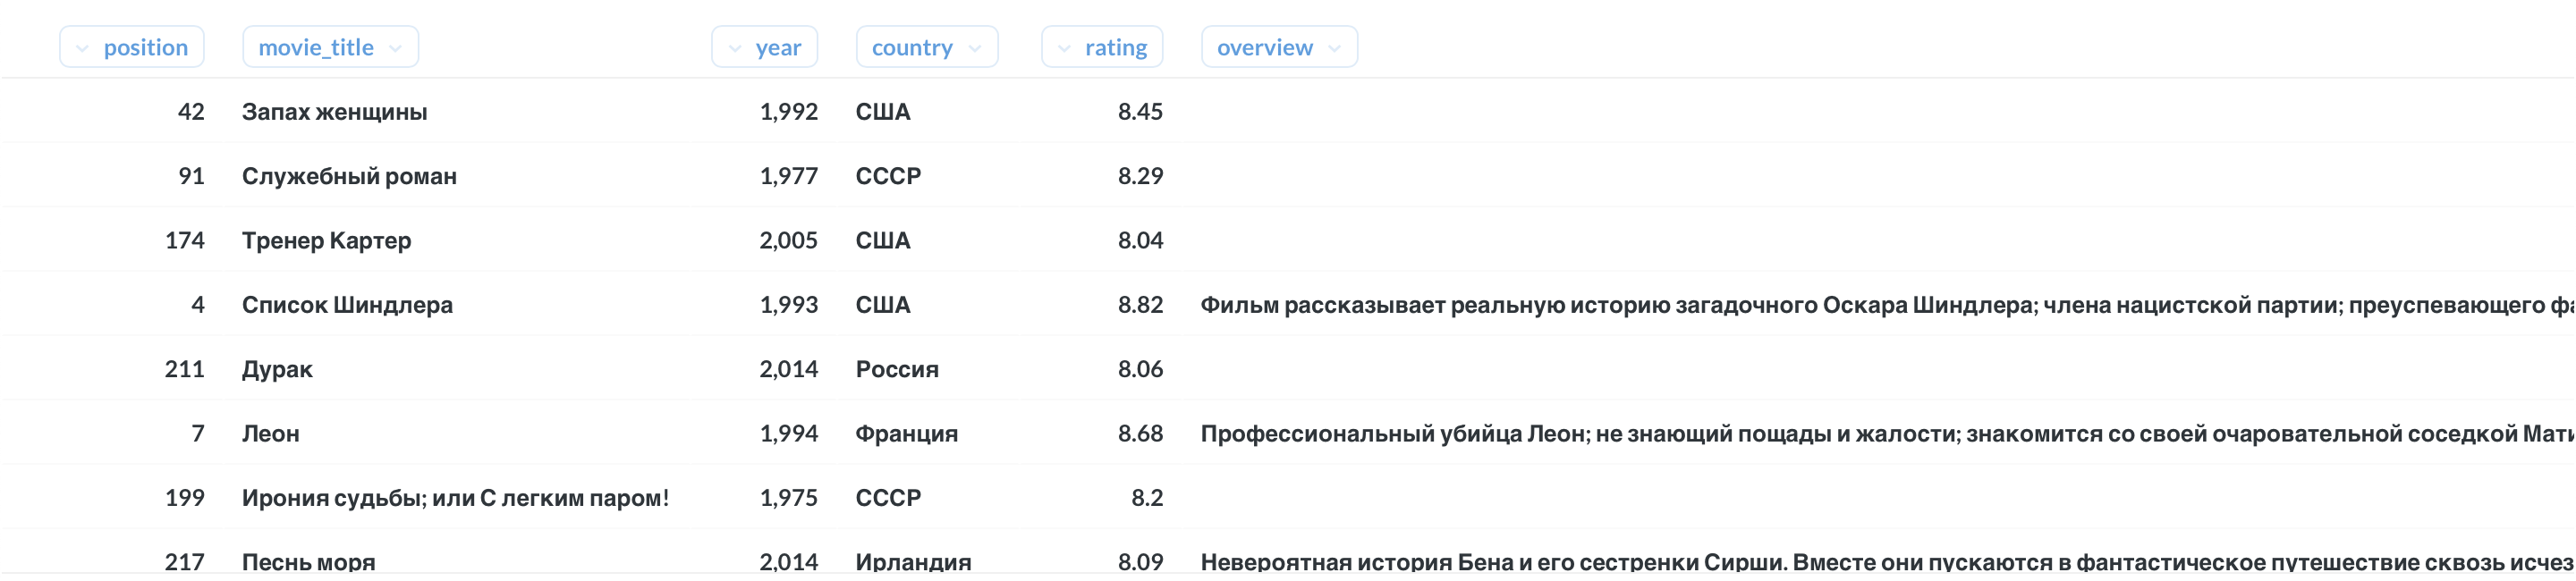

Для пустых значений есть специальное обозначение — NULL.


При этом вы не можете просто приравнять значение к NULL. Проверим это на следующем запросе:

<code>

SELECT *

FROM sql.kinopoisk

WHERE overview = NULL
</code>

Как вы заметили, вывод пустой, хотя мы точно видели фильмы с отсутствующим описанием.

А теперь попробуйте изменить условие на overview IS NULL.

Если вы всё сделали верно, то получили все фильмы, у которых в таблице отсутствует описание.

Вы можете добавить к условию уже изученное ключевое слово NOT, чтобы получилось overview IS NOT NULL, тогда в выводе вы увидите только фильмы с заполненным описанием.

**Важно!** NULL — это специальное значение. Если вы фильтруете столбец, в котором есть пустые значения, по любому условию, кроме IS NULL / IS NOT NULL, такие значения будут исключены из вывода.

# 3. Сортировка

## ORDER BY

Когда мы говорили о последовательности столбцов в выводе, вы, вероятно, задались вопросом: «А в каком порядке выводятся строки?»

Порядок вывода строк может задаваться в настройках базы данных для каждой таблицы. Более того, этот порядок может быть не задан, и тогда от вывода к выводу он будет разным.

Чтобы задать порядок вывода строк в запросе, применим новое ключевое слово ORDER BY.


Для примера отсортируем фильмы по их названию в алфавитном порядке.

<code>

SELECT *

FROM sql.kinopoisk

ORDER BY movie_title
</code>

Как видите, сортировка по возрастанию проводится по умолчанию.

Наш запрос с сортировкой по названию аналогичен такому:

<code>

SELECT *

FROM sql.kinopoisk

ORDER BY rating ASC
</code>

Здесь ASC — явное указание порядка сортировки по возрастанию (англ. ascending).

Для обратного порядка используется ключевое слово DESC (англ. descending).

Разумеется, мы можем комбинировать в нашем запросе фильтрацию строк и сортировку вывода, а также выводить только необходимые столбцы.

Выведем названия, имена режиссёров и сценаристов, а также год выхода в прокат фильмов, выпущенных в СССР, и отсортируем результат по убыванию рейтинга.

<code>

SELECT

    movie_title,

    director,

    screenwriter,

    year

FROM sql.kinopoisk

WHERE country = 'СССР'

ORDER BY rating DESC
</code>

**Обратите внимание!** Ключевое слово ORDER BY идёт после применения всех условий в WHERE.

Также в ORDER BY можно указывать, где должны идти пустые значения — в начале или в конце.

Такая настройка порядка вывода задаётся с помощью ключевых слов NULLS FIRST / NULLS LAST.

<code>

SELECT

    movie_title,

    rating,

    overview,

    year

FROM sql.kinopoisk

ORDER BY overview
</code>

А теперь измените последнюю строку скрипта на ORDER BY overview NULLS FIRST.

Такой запрос выведет первыми строки с пустым описанием.

Вы можете сортировать вывод по нескольким столбцам, просто указав их через запятую в ORDER BY (порядок сортировки указывается отдельно для каждого столбца).

Кроме того, вы можете сортировать результат запроса и по тем столбцам, которых нет в выводе.


Получили список всех режиссёров и фильмов из ТОП-250, отсортированных по году выхода в прокат, а внутри года — по рейтингу в порядке убывания.

<code>

SELECT

    director,

    movie_title

FROM sql.kinopoisk

ORDER BY year, rating DESC
</code>

Для упрощения работы с ORDER BY можно использовать не названия столбцов, а их **номера из вывода**.

<code>

SELECT

    director,

    movie_title,

    year

FROM sql.kinopoisk

ORDER BY 1, 3 DESC
</code>

Сортировку по номеру столбца стоит использовать с осторожностью, поскольку при изменении вывода в SELECT всё может сбиться.

При добавлении новых столбцов в SELECT нужно проверить и при необходимости поправить номера столбцов в ORDER BY.

# 4. Ограничение вывода

## LIMIT

По умолчанию при любом запросе вы получаете в выводе все строки, попадающие под условия запроса.

Чаще всего именно этого вы и ожидаете, но иногда, например, вам нужно просто взглянуть на содержание таблицы, при этом чем она она больше, тем дольше будет работать запрос.

Ограничим вывод первыми десятью строками и сможем легко понять, какие данные хранятся в таблице, не утяжеляя результат.

<code>

SELECT *

FROM sql.kinopoisk

LIMIT 10
</code>

Ещё один типичный случай использования ограничения вывода — вывод ТОПа по какому-то показателю.


Выведем ТОП-5 фильмов по рейтингу, сначала отсортировав их по убыванию, а потом оставив только верхние пять строк с помощью LIMIT.

<code>

SELECT

    movie_title,

    rating

FROM sql.kinopoisk 

ORDER BY rating DESC

LIMIT 5
</code>

**Обратите внимание!** Ключевое слово LIMIT используется в самом конце запроса.

## OFFSET

Если LIMIT «оставляет» указанное число первых строк из вывода, то OFFSET, наоборот, «обрезает» указанное число первых строк.

LIMIT и OFFSET можно использовать вместе, их порядок не важен.


Выведем название и рейтинг фильмов с четвёртого по восьмое место.

<code>

SELECT

    movie_title,

    rating 

FROM sql.kinopoisk

ORDER BY rating DESC

OFFSET 3 LIMIT 5
</code>

Таким образом, LIMIT отсчитывает количество строк после указанной в OFFSET строки.

# 5. Итоги

✍ В этом модуле вы отлично потрудились:

* познакомились с первыми операторами и ключевыми словами;
* научились выводить только необходимые столбцы, а также задавать базовые условия для фильтрации строк;
* произвели первые арифметические операции с данными;
* научились сортировать и ограничивать полученные данные.
Этого достаточно, чтобы делать простые запросы к БД.

Напоследок напомним структуру простого запроса:

<code>

SELECT

    столбец1 AS новое_название,

    столбец2,

    столбец3

FROM таблица

WHERE (условие1 OR условие2)

    AND условие3

ORDER BY сортировка1, сортировка2

OFFSET 1 LIMIT 2

</code>